# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from skopt import BayesSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

In [95]:
klasifikasi_df = pd.read_csv("Dataset_klasifikasi.csv")
klasifikasi_df

,mileage,engine,max_power,km_driven,transmission,Cluster
0,23.40,1248.0,74.00,145500,1,1
1,21.14,1498.0,103.52,120000,1,1
2,17.70,1497.0,78.00,140000,1,3
3,23.00,1396.0,90.00,127000,1,1
4,16.10,1298.0,88.20,120000,1,3
...,...,...,...,...,...,...
6901,18.90,998.0,67.10,50000,1,3
6902,22.54,1396.0,88.73,80000,1,1
6903,18.50,1197.0,82.85,110000,1,3
6904,16.80,1493.0,110.00,119000,1,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [96]:

X = klasifikasi_df.drop(columns=[klasifikasi_df.columns[-1]])
y = klasifikasi_df[klasifikasi_df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Ukuran data latih:", X_train.shape, y_train.shape)
print("Ukuran data uji:", X_test.shape, y_test.shape)


Ukuran data latih: (5524, 5) (5524,)
Ukuran data uji: (1382, 5) (1382,)


In [97]:
print("Distribusi kelas:", np.bincount(y_train))

Distribusi kelas: [ 480 2025  764 2255]


**Distribusi clusters tidak merata (Imbalanced dataset), maka akan menggunakan SMOTE**

In [98]:
le = LabelEncoder()
X_train = pd.get_dummies(X_train)

y_train_encoded = le.fit_transform(y_train)  # Mengonversi kategori ke angka

smote = SMOTE(random_state=95)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)
print("Distribusi kelas setelah dilakukan SMOTE:", np.bincount(y_train_resampled))

Distribusi kelas setelah dilakukan SMOTE: [2255 2255 2255 2255]


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [99]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred_dt = dt_model.predict(X_test)

# Mengevaluasi performa model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt, report_dt

(0.9862518089725036,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       104\n           1       0.98      0.99      0.98       535\n           2       0.99      0.99      0.99       164\n           3       0.99      0.98      0.99       579\n\n    accuracy                           0.99      1382\n   macro avg       0.99      0.99      0.99      1382\nweighted avg       0.99      0.99      0.99      1382\n')

In [100]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred_rf = rf_model.predict(X_test)

# Mengevaluasi performa model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)


In [101]:
# Inisialisasi model KNN (misal, k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model pada data latih
knn.fit(X_train, y_train)

# Memprediksi data uji
y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')

**Decision Tree** memberikan hasil yang sangat tinggi dengan akurasi 99,78%. Semua kelas memiliki precision, recall, dan f1-score yang mendekati 1, menunjukkan model hampir sempurna dalam membedakan kelas.

**Random Forest** karena hasilnya hampir mendekati sempurna dengan akurasi 99,93%, sedikit lebih baik dibandingkan Decision Tree. Semua kelas memiliki precision, recall, dan f1-score yang sangat tinggi, menunjukkan model ini sangat baik dalam klasifikasi.

analisis : Random Forest lebih unggul dibandingkan Decision Tree karena memiliki akurasi lebih tinggi dan lebih tahan terhadap overfitting. Jika kecepatan lebih diutamakan, Decision Tree tetap pilihan yang baik karena lebih ringan dalam komputasi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [102]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menghitung metrik evaluasi untuk Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("==== Random Forest Classifier ====")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision (weighted): {precision_rf:.4f}")
print(f"Recall (weighted): {recall_rf:.4f}")
print(f"F1-Score (weighted): {f1_rf:.4f}")
print("\n" + "-"*40 + "\n")


==== Random Forest Classifier ====
Accuracy: 0.9877
Precision (weighted): 0.9877
Recall (weighted): 0.9877
F1-Score (weighted): 0.9877

----------------------------------------



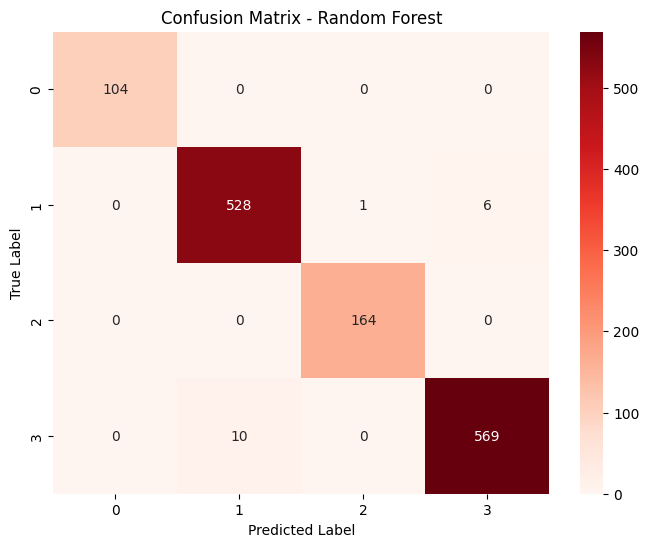

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Reds", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [104]:
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')


print("==== Decision Tree ====")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision (weighted): {precision_dt:.4f}")
print(f"Recall (weighted): {recall_dt:.4f}")
print(f"F1-Score (weighted): {f1_dt:.4f}")
print("\n" + "-"*40 + "\n")

==== Decision Tree ====
Accuracy: 0.9863
Precision (weighted): 0.9863
Recall (weighted): 0.9863
F1-Score (weighted): 0.9863

----------------------------------------



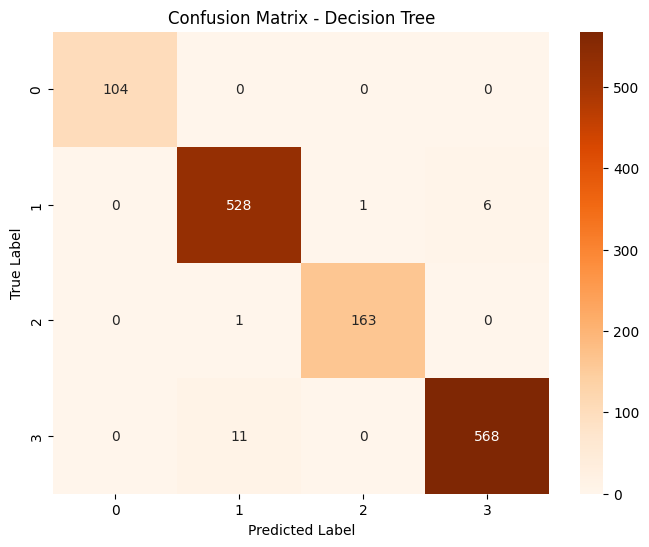

In [105]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Oranges", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

## Random Forest Classifier
- **Accuracy:** 98.77%  
- **Precision (weighted):** 98.77%  
- **Recall (weighted):** 98.77%  
- **F1-Score (weighted):** 98.77%

## Decision Tree
- **Accuracy:** 98.63%  
- **Precision (weighted):** 98.63%  
- **Recall (weighted):** 98.63%  
- **F1-Score (weighted):** 98.63%

Analisis : Meskipun kedua algoritma menunjukkan performa yang sangat tinggi, **Random Forest Classifier** sedikit lebih unggul dibandingkan **Decision Tree** dari semua metrik evaluasi. Karena Random Forest merupakan **ensemble dari banyak Decision Tree**, sehingga lebih stabil dan mampu **mengurangi kemungkinan overfitting** yang biasa terjadi pada single Decision Tree. nammun, perbedaan performa antara keduanya sangat kecil (**sekitar 0.14%**).  
mungkin **Decision Tree** lebih cepat dan lebih mudah diinterpretasikan dibandingkan Random Forest, namun rentan terhadap overfitting jika tidak dilakukan teknik **pruning**.




## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [106]:

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)  # Banyaknya pohon
    max_depth = trial.suggest_int('max_depth', 2, 32)           # Kedalaman pohon
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)  # Min sample utk split
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)    # Min sample utk daun
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])  # Menggunakan bootstrap sampling atau tidak

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42
    )
    
    # 5-fold cross validation
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Menjalankan optimasi
best_score = optuna.create_study(direction='maximize')
best_score.optimize(objective, n_trials=50)

# Menampilkan hasil terbaik
print("Best Parameters:", best_score.best_params)
print("Best Accuracy:", best_score.best_value)

[I 2025-04-09 12:53:23,011] A new study created in memory with name: no-name-a98eea6f-1f14-4f23-b20d-fe581e3cfc58
[I 2025-04-09 12:53:30,104] Trial 0 finished with value: 0.9768274968850417 and parameters: {'n_estimators': 155, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 11, 'bootstrap': True}. Best is trial 0 with value: 0.9768274968850417.
[I 2025-04-09 12:53:35,771] Trial 1 finished with value: 0.9766465014099286 and parameters: {'n_estimators': 144, 'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 20, 'bootstrap': False}. Best is trial 0 with value: 0.9768274968850417.
[I 2025-04-09 12:53:42,561] Trial 2 finished with value: 0.9775516427306709 and parameters: {'n_estimators': 192, 'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 18, 'bootstrap': False}. Best is trial 2 with value: 0.9775516427306709.
[I 2025-04-09 12:53:51,968] Trial 3 finished with value: 0.9580013443504493 and parameters: {'n_estimators': 183, 'max_depth': 5, 'min_sample

Best Parameters: {'n_estimators': 186, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 2, 'bootstrap': False}
Best Accuracy: 0.9835261328611713


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
# Ambil parameter terbaik
best_params = best_score.best_params

# Buat model RandomForest baru dengan parameter terbaik
rf_best = RandomForestClassifier(**best_params, random_state=42)

# Fit ke data training
rf_best.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=11, min_samples_leaf=2,
                       min_samples_split=9, n_estimators=186, random_state=42)

In [118]:
# Membuat DataFrame evaluasi model
eval_metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Best Hyperparameter Accuracy"],
    "Score": [accuracy, precision, recall, f1, best_score.best_value]
})

# Menampilkan hasil
eval_metrics

,Metric,Score
0,Accuracy,0.986975
1,Precision,0.987001
2,Recall,0.986975
3,F1-Score,0.986974
4,Best Hyperparameter Accuracy,0.983526


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

## Hasil Evaluasi Model Random Forest

Berdasarkan hasil evaluasi, performa model Random Forest **mengalami sedikit penurunan** setelah dilakukan Hyperparameter Tuning menggunakan Bayesian Optimization (Optuna).

- **Akurasi** sedikit menurun dari **98.77%** menjadi **98.70%**, menunjukkan bahwa kemampuan model untuk mengklasifikasikan data dengan benar sedikit berkurang.
- **Precision** turun dari **98.77%** menjadi **98.70%**, yang berarti akurasi dalam memberikan prediksi positif yang benar sedikit menurun.
- **Recall** juga turun dari **98.77%** menjadi **98.70%**, menunjukkan bahwa model sedikit berkurang dalam mendeteksi data positif yang sebenarnya.
- **F1-Score** mengalami penurunan dari **98.77%** menjadi **98.70%**, mengindikasikan keseimbangan precision dan recall yang sedikit lebih rendah setelah tuning.

Meskipun telah dilakukan Hyperparameter Tuning, **Best Hyperparameter Accuracy** hanya mencapai **98.35%**, sedikit lebih rendah dibandingkan akurasi model awal.

Secara keseluruhan, Hyperparameter Tuning menggunakan Bayesian Optimization **tidak berhasil meningkatkan performa model Random Forest** secara signifikan. Bahkan terjadi sedikit **penurunan** pada seluruh metrik evaluasi.

Hal ini menunjukkan bahwa konfigurasi default Random Forest sebelumnya sudah cukup optimal untuk dataset ini. Oleh karena itu, perlu dipertimbangkan untuk:
- Melakukan tuning lanjutan dengan cakupan parameter yang lebih luas.
- Mencoba metode tuning lain seperti **GridSearchCV** atau **RandomizedSearchCV**.
- Menguji algoritma klasifikasi lain untuk membandingkan performa model terhadap dataset yang digunakan.
